<class 'nibabel.nifti1.Nifti1Image'>
(96, 128, 128)


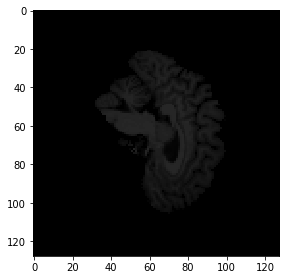

In [67]:
import nibabel as nib
import skimage.io as io
import numpy as np
from dipy.align.imaffine import (transform_centers_of_mass,
                                 AffineMap,
                                 MutualInformationMetric,
                                 AffineRegistration)
from dipy.viz import regtools


img = nib.load('d:/Downloads/neurodatadesign/ndmg_outputs/anat/preproc/t1w_brain_nores.nii.gz')
print(type(img))
print(img.shape)
img_arr = img.get_data()
io.imshow(img_arr[45, :, :])

<class 'nibabel.nifti1.Nifti1Image'>
(128, 128, 62, 31)


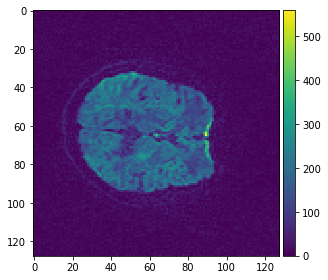

In [68]:
img_reg = nib.load('d:/Downloads/neurodatadesign/BNU1/sub-0025864/ses-1/dwi/sub-0025864_ses-1_dwi.nii.gz')
print(type(img_reg))
print(img_reg.shape)
img_arr_reg = img_reg.get_data()
io.imshow(img_arr_reg[:, :, 30, 15])

<class 'nibabel.nifti1.Nifti1Image'>
(91, 109, 91)


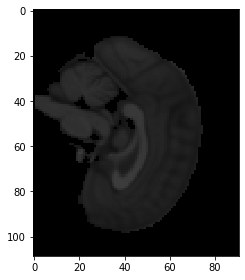

In [69]:
img_sti = nib.load('e:/MNI152_T1_2mm_brain.nii.gz')
print(type(img_sti))
print(img_sti.shape)
img_sti_arr = img_sti.get_data()
io.imshow(img_sti_arr[45])

<class 'nibabel.nifti1.Nifti1Image'>
(96, 128, 128)


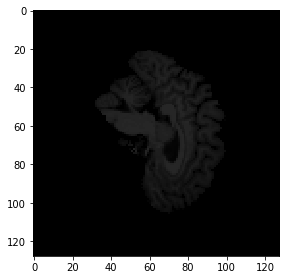

In [70]:
img_in = nib.load('d:/Downloads/neurodatadesign/ndmg_outputs/anat/preproc/t1w_brain_nores.nii.gz')
print(type(img_in))
print(img_in.shape)
img_in_arr = img_in.get_data()
io.imshow(img_in_arr[45])

<class 'nibabel.nifti1.Nifti1Image'>
(91, 109, 91)


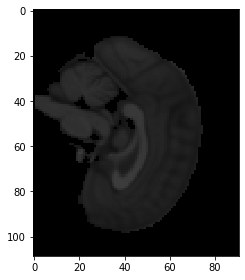

In [71]:
img_com = nib.load('e:/MNI152_T1_2mm_brain.nii.gz')
print(type(img_com))
print(img_com.shape)
img_com_arr = img_com.get_data()
io.imshow(img_com_arr[45])

<class 'nibabel.nifti1.Nifti1Image'>
(141, 141, 68)


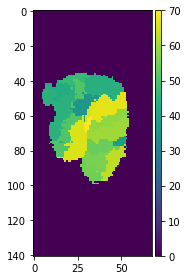

In [72]:
img_out = nib.load('d:/Downloads/neurodatadesign/ndmg_outputs/anat/registered/desikan_space-MNI152NLin6_res-2x2x2_reor_RAS_nores_aligned_atlas.nii.gz')
print(type(img_out))
print(img_out.shape)
img_out_arr = img_out.get_data()
io.imshow(img_out_arr[45])

In [73]:
from dipy.viz import regtools
# fig = regtools.overlay_images(img_out_arr[45], img_com_arr[45], 'FAST','overlay', 'dipy.tissueclass', 'make2.png')

# print(fig)
# regtools.overlay_slices(img_com_arr, img_out_arr, None, 2, 'com', 'out', 'make1.png')

(96, 128, 128)
(91, 109, 91)
(91, 109, 91)


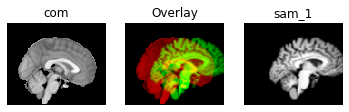

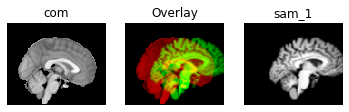

In [76]:
identity = np.eye(4)
print(img_in_arr.shape)
# regtools.overlay_slices(img_com_arr, img_in_arr, None, 0,
#                         "com", "sam", "resampled_0.png")
affine_map = AffineMap(identity,
                       img_com_arr.shape, img_com.affine,
                       img_in_arr.shape, img_in.affine)
sam_1 = affine_map.transform(img_in_arr)
print(sam_1.shape)
print(img_com.shape)
regtools.overlay_slices(img_com_arr, sam_1, None, 0,
                        "com", "sam_1")


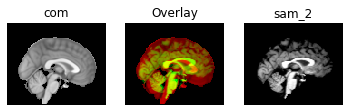

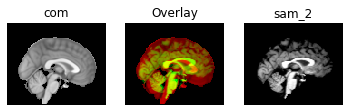

In [79]:
c_of_mass = transform_centers_of_mass(img_com_arr, img_com.affine,
                                      img_in_arr, img_in.affine)
sam_2 = c_of_mass.transform(img_in_arr)
regtools.overlay_slices(img_com_arr, sam_2, None, 0,
                        "com", "sam_2")